In [1]:
#General
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For the Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

#importing the data
df=pd.read_csv('winequality-red.csv')
print(df.shape)
df.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


##### Cleaning Dataset and filling up missing values

In [2]:
#Check total Number of missing values
print(df.isnull().sum().sum())

#Since no missing values, therefore i will just move to my model

0


##### Finding Correlations 

In [3]:
cor=df.corr().reset_index()
cor['quality']=cor['quality']*100
cor

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,12.405165
1,volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-39.055778
2,citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,22.637251
3,residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,1.373164
4,chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-12.890656
5,free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-5.065606
6,total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-18.510029
7,density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-17.491923
8,pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-5.773139
9,sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,25.139708


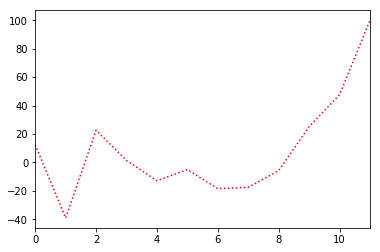

In [4]:
cor['quality'].plot.line(color='red',linestyle=':')

Based on the correlation selecting the columns:

0: fixed acidity ,2: citric acid , 3: residual sugar ,4: chlorides , 5: free sulfur dioxide , 6: total sulfur dioxide ,7: density , 8: pH , 9: sulphates , 10: alcohol 

among the top selected, 1,4 and 6 are least !

#### Forming X and Y sets, and then train/test split

In [6]:
columns_x=['fixed acidity','citric acid','residual sugar','chlorides',
           'free sulfur dioxide','total sulfur dioxide','density',
      'pH','sulphates','alcohol']
x=df[columns_x]
y=df[['quality']]

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=6)

#### Model and fitting the data 

In [7]:
# This Class also includes the Mulivariate regression
mlr=LinearRegression(normalize=True)

#Fitting the data 
mlr.fit(x_train,y_train)

#printing the coefficients
coef=mlr.coef_.T
coeficients_frame=pd.DataFrame(coef,index=columns_x,columns=['Coeficients'])
coeficients_frame

,Coeficients
fixed acidity,0.013281
citric acid,0.581595
residual sugar,0.019986
chlorides,-2.961298
free sulfur dioxide,0.006660
total sulfur dioxide,-0.004048
density,-43.805194
pH,-0.342763
sulphates,1.133478
alcohol,0.250581


#### Checking for the test set 

In [8]:
# Predicted rating for test dataset 
y_predicted=mlr.predict(x_test)

#Print R^2 Values for both Train and Test
print('R^2 Train :',mlr.score(x_train,y_train),'\n')
print('R^2 Test :',mlr.score(x_test,y_test))

y_test_list=y_test['quality'].values.tolist()
#y_predicted_list=y_predicted.tolist()
l,j=y_predicted.shape
pred=[]
for h in range(l):
    pred.append(y_predicted[h][0])
display_comp = pd.DataFrame(list(zip(y_test_list, pred)),columns=['y_test','y_predicted'])
display_comp.head()

R^2 Train : 0.32324999641820495 

R^2 Test : 0.3415716936532919


,y_test,y_predicted
0,6,6.460679
1,6,6.172098
2,6,5.875076
3,5,5.367281
4,6,5.695667


#### Plot

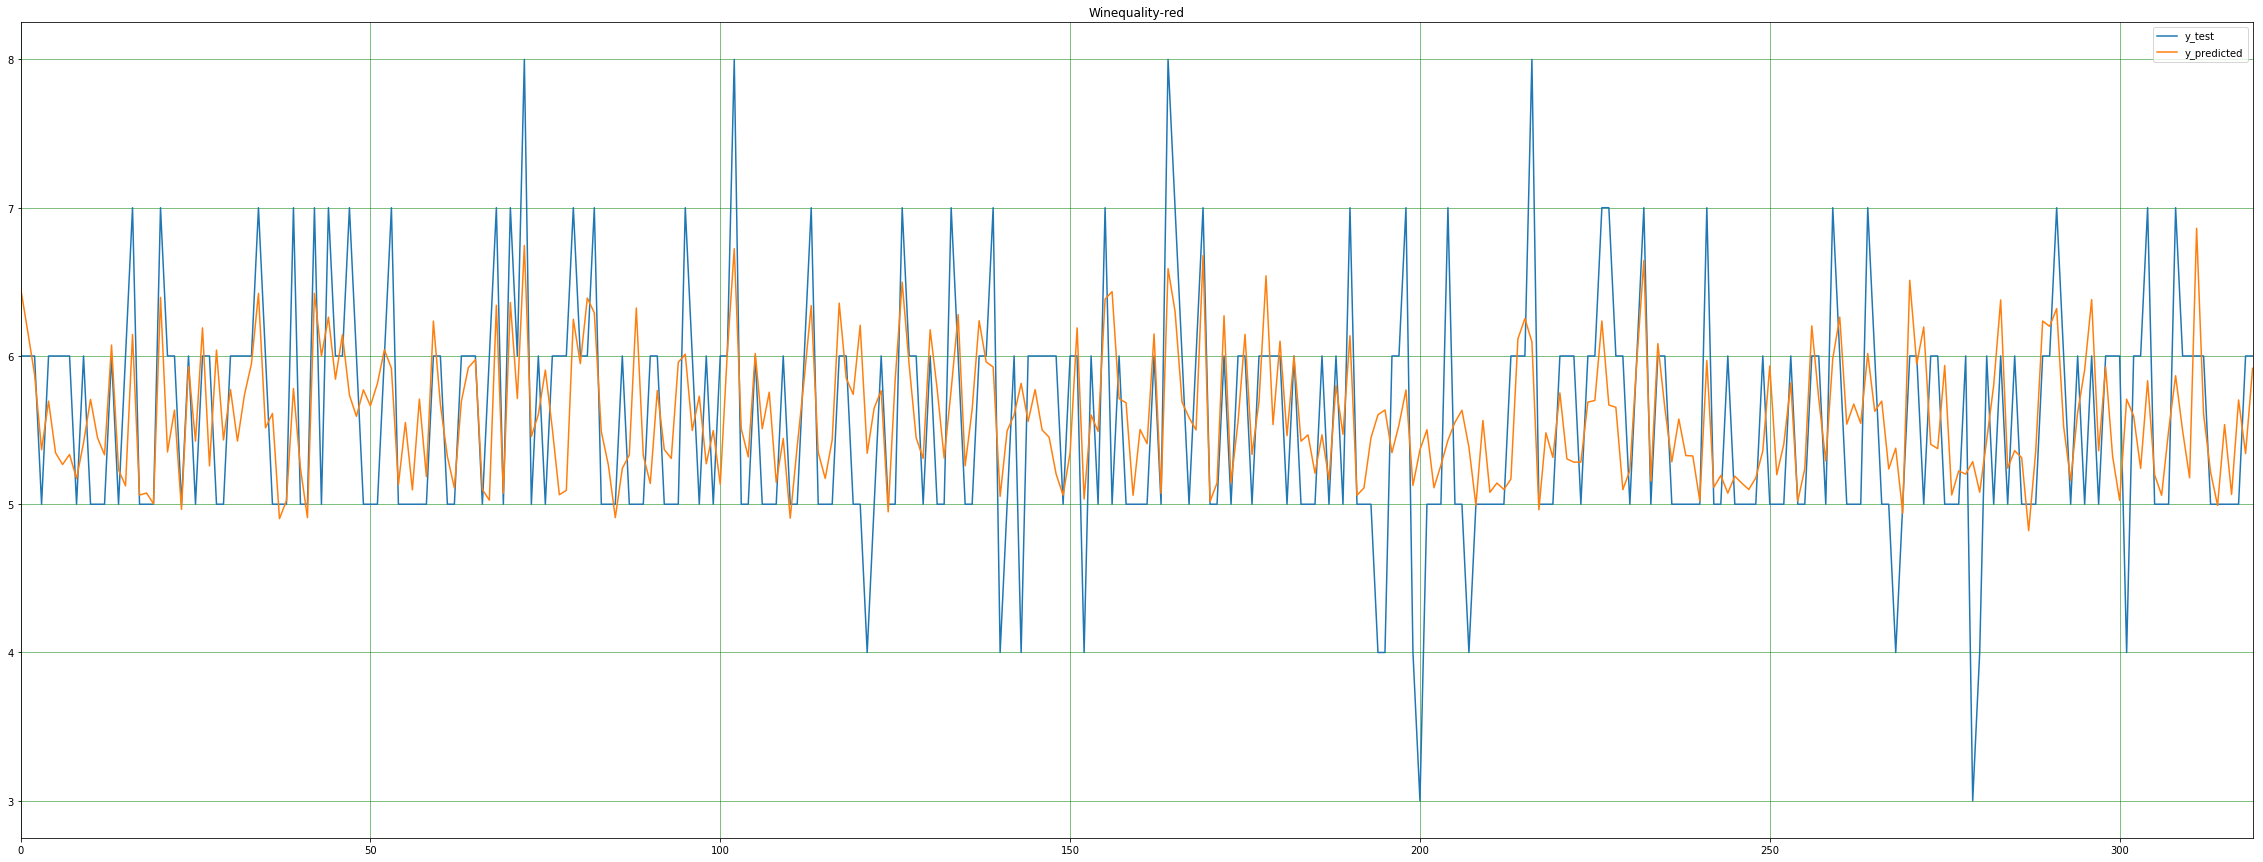

In [9]:
display_comp.plot(kind='line',figsize=(40,15))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Winequality-red')
plt.show()

In [10]:
wine=[[7.4,0.48,1.1,0.047,17,132,0.9914,3.19,0.49,11.6]]
rating=mlr.predict(wine)
print("Prediction for this Wine :",float(rating))

Prediction for this Wine : 5.880683308513589
